# MNIST Data Analysis - Basic Approach

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.

In [3]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

`one_hot` is the label format. It basically is a vector of length 10 of zeros and the actual label of the digit image will be 1.

Extracting mk027-project_MNIST_data_analysis_basic_approach/train-images-idx3-ubyte.gz
Extracting mk027-project_MNIST_data_analysis_basic_approach/train-labels-idx1-ubyte.gz
Extracting mk027-project_MNIST_data_analysis_basic_approach/t10k-images-idx3-ubyte.gz
Extracting mk027-project_MNIST_data_analysis_basic_approach/t10k-labels-idx1-ubyte.gz
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


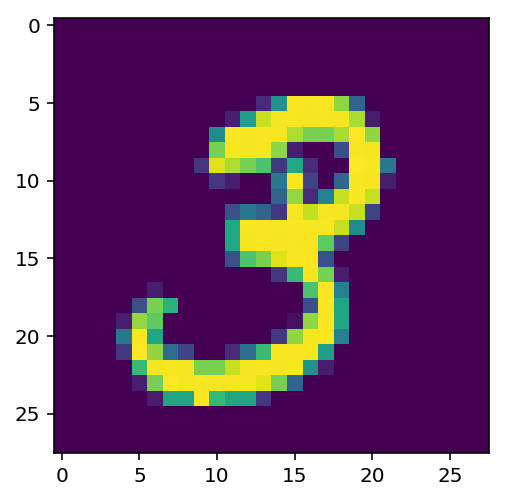

In [4]:
mnist = input_data.read_data_sets("mk027-project_MNIST_data_analysis_basic_approach/", one_hot=True)
plt.imshow(mnist.train.images[1].reshape(28, 28))
print(mnist.train.labels[1])

In [9]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

Training set of images for the neural network.

In [10]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
mnist.train.images.shape

(55000, 784)

In [12]:
mnist.train.num_examples

55000

In [13]:
mnist.test.num_examples

10000

In [14]:
mnist.train.images[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
mnist.train.images[1].shape

(784,)

In [16]:
mnist.train.images[1].reshape(28, 28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

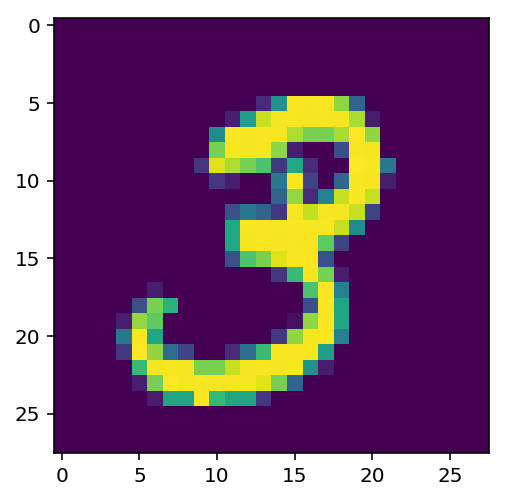

In [17]:
plt.imshow(mnist.train.images[1].reshape(28, 28))

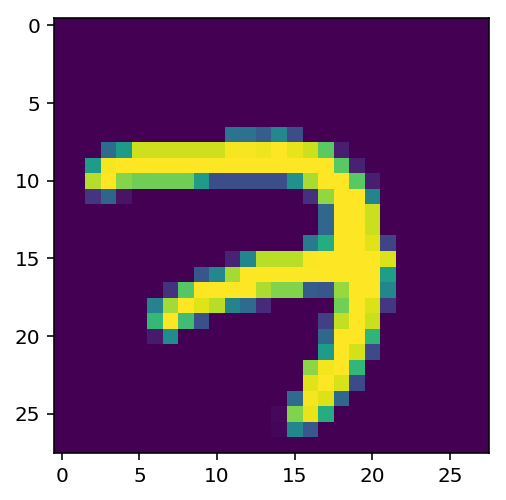

In [18]:
plt.imshow(mnist.train.images[0].reshape(28, 28))

In [19]:
[i for i in range(len(mnist.train.labels[0])) if mnist.train.labels[0][i] == 1]

[7]

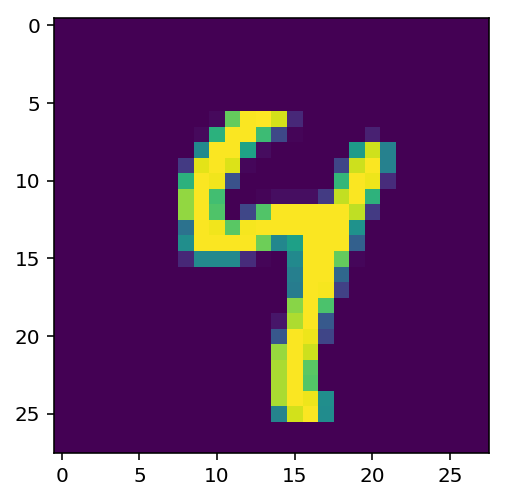

In [20]:
plt.imshow(mnist.train.images[2].reshape(28, 28))

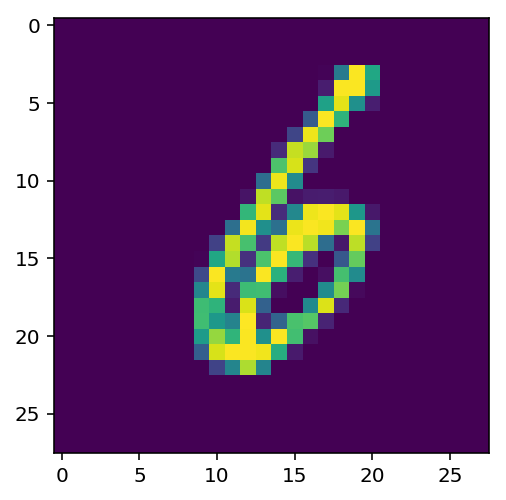

In [21]:
plt.imshow(mnist.train.images[2341].reshape(28, 28))

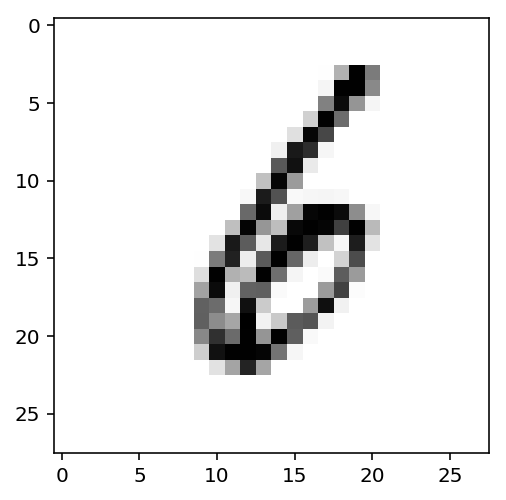

In [22]:
plt.imshow(mnist.train.images[2341].reshape(28, 28), cmap="Greys")

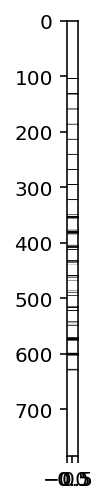

In [23]:
plt.imshow(mnist.train.images[2341].reshape(784, 1), cmap="Greys", aspect=0.05)

## Create the Model

784 is the actual pixel length per image, `None` stands for the batch size which will be decided later. Because there are too many images to be passed at once, we need to divide them into batches. The optimum batch size will be decided later.

In [24]:
x = tf.placeholder(tf.float32, shape=[None, 784])

`x_weight` is the coefficient of each pixel. Each pixel may get a value between 0 and 9 included. It will be multiplied with the digit matrix. So the shape of `x_weight` will be 784*10.

In [25]:
x_weight = tf.Variable(tf.zeros([784, 10]))

Instructions for updating:
Colocations handled automatically by placer.


`x_bias` is the deviation from the actual value. It can take a value between 0 and 9. It will be added to `x_weight`. So it must be a vector of 10 columns.

In [26]:
x_bias = tf.Variable(tf.zeros([1, 10]))

`y` is the label which will be predicted by the model.

In [27]:
y = tf.matmul(x, x_weight) + x_bias

## Loss and Optimizer

`y_true` will be the true label fed to the neural network for comparison.

In [28]:
y_true = tf.placeholder(tf.float32, shape=[None, 10])

`cross_entropy` is defined as the error between `y` and `y_true`. `optimizer` is an instance of `GradientDescentOptimizer`. The lower the `learning_rate` the slower the machine learns but with less error and vice versa... `train` is the resulting model for which `cross_entropy` is minimized by the `optimizer` method.

In [29]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

## Create Session

`init` will initialize all the values for all the variables, constant etc in the session. So right now everything is defined but nothing is run yet.

In [30]:
init = tf.global_variables_initializer()

In [31]:
with tf.Session() as sess:
    sess.run(init)
    
    # Now we state for how many steps we will train the model.
    for steps in range(1000):
        
        # 100 is the batch size we pass for each step.
        batch_x, batch_y = mnist.train.next_batch(100)
        
        # x and y_true in the feed_dict are the two placeholders defined before.
        # Their values must be defined for the session to run.
        sess.run(train, feed_dict={x:batch_x, y_true:batch_y})
        
    # matches is the difference between the actual labels y_true and predicted label y.
    matches = tf.equal(tf.argmax(y, 1), tf.argmax(y_true, 1))

    # tf.cast casts matches into a new tensor of tf.float32. 
    # tf.reduce_mean minimizes the mean of matches and assigns it to model.
    model = tf.reduce_mean(tf.cast(matches, tf.float32))

    # Now we will test our model with predicted test values and real test y values.
    print(sess.run(model, feed_dict={x:mnist.test.images, y_true:mnist.test.labels}))        

0.9196


The model is pretty good.